In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('Jobs.csv',sep=',',error_bad_lines=False)

<ipython-input-58-10d58f863660>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Jobs.csv',sep=',',error_bad_lines=False)


In [59]:
df.head()

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."


In [60]:
df.tail()

,Unnamed: 0,title,company,announcement,description
785,785,Research and Data Specialist,GovernmentJobs.com,Learn4Good.com,"Description $3,000 hiring bonus to join the J..."
786,786,Quality Assurance Data Specialist,Metrocare Services,Glassdoor,Are you looking for a purpose-driven career? A...
787,787,Senior Data Analyst,Gopuff,Startup Jobs,The Senior Data Analyst will join as an analyt...
788,788,Cost Controller/Data Analyst,Petroplan,Petroplan,Overview: The Cost Controller / Data Analyst p...
789,789,Data Specialist,Hicuity Health,Monster,"Overview: Hicuity Health, the leading high ac..."


In [61]:
df.shape

(790, 5)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    790 non-null    int64 
 1   title         790 non-null    object
 2   company       790 non-null    object
 3   announcement  790 non-null    object
 4   description   790 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.0+ KB


In [63]:
df.isnull().sum()

Unnamed: 0      0
title           0
company         0
announcement    0
description     0
dtype: int64

In [64]:
df.describe()

,Unnamed: 0
count,790.000000
mean,394.500000
std,228.197648
min,0.000000
25%,197.250000
50%,394.500000
75%,591.750000
max,789.000000


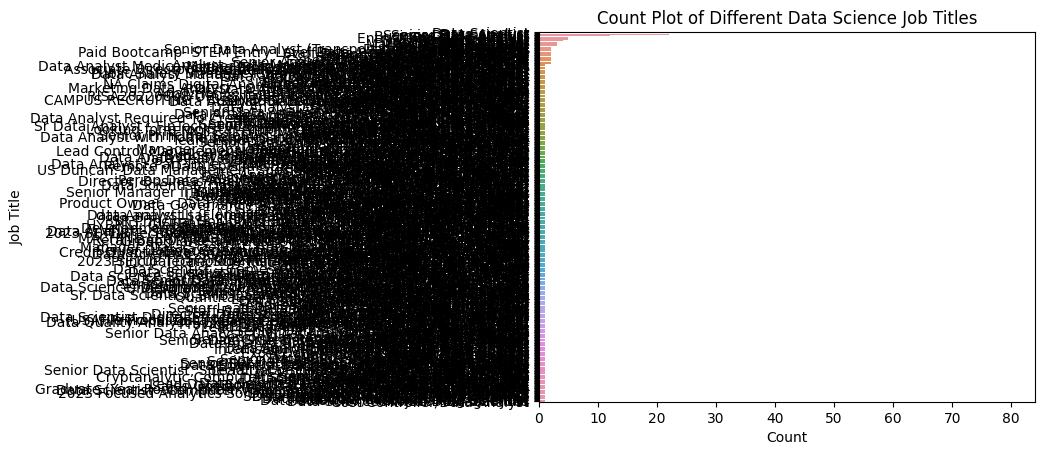

In [65]:
sns.countplot(y= 'title', data = df, order = df['title'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Data Science Job Titles')

plt.show()


In [66]:
list_of_titles = df['title'].unique()
print('There are {} unique job titles for Data Scientist postings'.format(len(list_of_titles)))

There are 515 unique job titles for Data Scientist postings


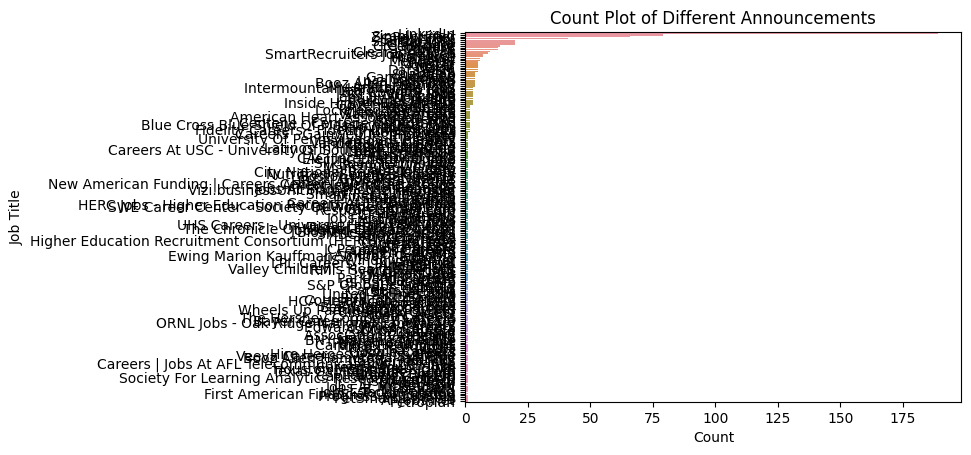

In [67]:
sns.countplot(y= 'announcement', data = df, order = df['announcement'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Announcements')
plt.show()

In [68]:
list_of_jobboards = df['announcement'].unique()
print('There are {} unique job boards used for Data Scientist postings'.format(len(list_of_jobboards)))

There are 203 unique job boards used for Data Scientist postings


In [69]:
duplicates = df['description'].duplicated()
df[duplicates]

,Unnamed: 0,title,company,announcement,description


In [70]:
df['title'].unique()

array(['Senior Analyst, Data Science and Analytics',
       'Senior Data Scientist', 'Lead Data Science Analyst',
       'Data Science Intern', 'Data Scientist',
       'Senior Solutions Architect (Data Science)',
       'Data Scientist - Research, Development & Construction',
       'Data Science Manager - S&A Strategy',
       'Senior/Principal Data Scientist', 'Data Science Analyst',
       'Senior Data Scientist - Knowledge Management',
       'Data Scientist, Consultant', 'Senior-Data Scientist',
       'Staff Data Scientist', 'Data Science Internship',
       'Undergrad Intern – Data Science Program (Summer 2023)',
       'Data Science, Department of Information Technology - Adjunct Faculty',
       'Summer 2023 Intelligent Sensors Data Science Intern',
       'Associate Director Data Science',
       'Data Science Senior Advisor (Solution Value Analytics) - Evernorth',
       'Director, Data Science',
       'Senior Manager, Institutional Data Analytics and Reporting',
       'D

In [71]:
df['title'] = df['title'].str.lower()

mask1 = df['title'].str.contains('data science')
mask2 = df['title'].str.contains('data scientist')

mask = mask1 | mask2
df = df[mask]

In [72]:
df['title'].unique()

array(['senior analyst, data science and analytics',
       'senior data scientist', 'lead data science analyst',
       'data science intern', 'data scientist',
       'senior solutions architect (data science)',
       'data scientist - research, development & construction',
       'data science manager - s&a strategy',
       'senior/principal data scientist', 'data science analyst',
       'senior data scientist - knowledge management',
       'data scientist, consultant', 'senior-data scientist',
       'staff data scientist', 'data science internship',
       'undergrad intern – data science program (summer 2023)',
       'data science, department of information technology - adjunct faculty',
       'summer 2023 intelligent sensors data science intern',
       'associate director data science',
       'data science senior advisor (solution value analytics) - evernorth',
       'director, data science',
       'data scientist, ts/sci with polygraph jobs',
       'data scientist/an

In [73]:
print('There are {} unique job titles for Data Scientist postings'.format(len(df['title'].unique())))

There are 191 unique job titles for Data Scientist postings


In [74]:
def replace_title(title):
    if 'lead' in title or 'principal' in title or 'founding' in title:
        return 'Lead Data Scientist'
    elif 'senior' in title or 'sr' in title:
        return 'Senior Data Scientist'
    elif 'manager' in title:
        return 'Data Science Manager'
    elif 'intern' in title:
        return 'Intern Data Scientist'
    elif 'vp' in title or 'vice president' in title:
        return 'VP of Data Science'
    elif 'director' in title:
        return 'Director of Data Science'
    elif 'staff' in title:
        return 'Staff Data Scientist'
    elif 'jr' in title or 'junior' in title:
        return 'Junior Data Scientist'
    elif 'data scientist' in title or 'data science' in title:
        return 'Data Scientist'
    else:
        return title
df['title'] = df['title'].apply(replace_title)

<ipython-input-74-5a5066b6cc7f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].apply(replace_title)


In [75]:
df['title'].unique()

array(['Senior Data Scientist', 'Lead Data Scientist',
       'Intern Data Scientist', 'Data Scientist', 'Data Science Manager',
       'Staff Data Scientist', 'Director of Data Science',
       'VP of Data Science', 'Junior Data Scientist'], dtype=object)

In [76]:
print('There are {} unique job titles for Data Scientist postings'.format(len(df['title'].unique())))

There are 9 unique job titles for Data Scientist postings


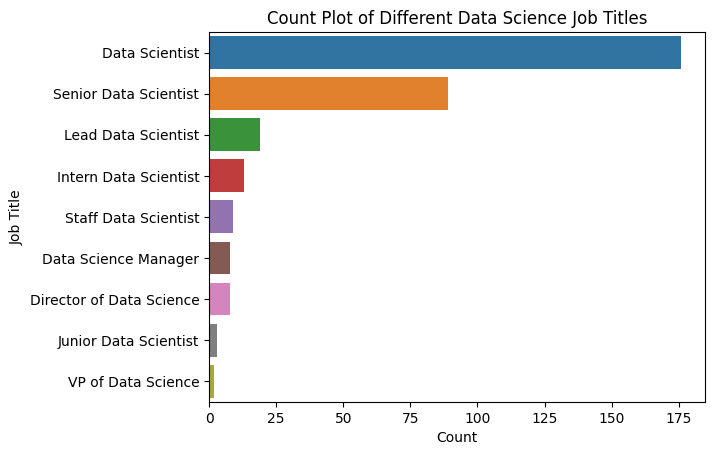

In [77]:
sns.countplot(y= 'title', data = df, order = df['title'].value_counts().index)

plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Data Science Job Titles')

plt.show()

In [78]:
df['description']

0      TransUnion's Job Applicant Privacy Notice  Wha...
1      About The Opportunity  We're all about connect...
2      Discover. A brighter future.  With us, you’ll ...
3      Are you a 2023 college graduate or rising coll...
4      JOB DESCRIPTION:  At NORC, Data Scientists pla...
                             ...                        
326    Dice is the leading career destination for tec...
584    Secure our Nation, Ignite your Future  Join th...
694    Company Overview:  Join the world’s only threa...
698    An exciting career awaits you  At MPC, we're c...
700    We are looking for a expert level and experien...
Name: description, Length: 327, dtype: object

In [79]:
df['word_count'] = df['description'].str.split().str.len()

In [80]:
summary = df['word_count'].describe(percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
summary

count     327.000000
mean      668.584098
std       287.396113
min        37.000000
10%       301.000000
20%       408.200000
30%       491.000000
40%       583.400000
50%       660.000000
60%       761.600000
70%       828.000000
80%       904.600000
90%      1026.800000
100%     1481.000000
max      1481.000000
Name: word_count, dtype: float64

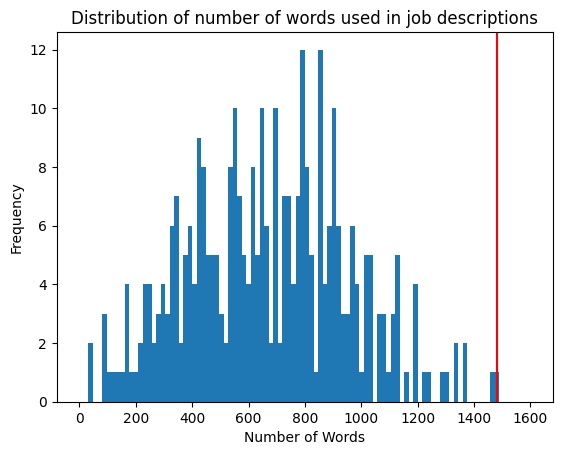

In [81]:
df['word_count'].plot.hist(xticks = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600], bins = 100, range = [0, 1600]).axvline(x= summary['100%'], c = 'red')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of number of words used in job descriptions')
plt.show()

In [82]:
from fuzzywuzzy import fuzz
tools = ["Python","R","SQL","Jupyter","NumPy","Pandas","Matplotlib","Seaborn",
                      "SciPy","Scikit-Learn","TensorFlow","PyTorch","Keras","XGBoost","LightGBM",
                      "Plotly","Dask","Spark","Hadoop","AWS","Google Cloud",
                      "Azure","IBM Watson","NLTK","OpenCV","Gensim","StatsModels",
                      "Theano","Caffe","Keras-Tuner","Auto-Keras","Auto-Sklearn","Shap","ELI5","Bokeh",
                      "Folium","ggplot","plotnine","Geopandas","Datashader","Yellowbrick","H2O.ai","Flask",
                      "Dash","Streamlit","FastAPI","PySpark","TensorBoard","cuDF","NetworkX","BeautifulSoup",
                      "Scrapy","Numba","Cython", "Apache", "Git"]

def match_phrases(description, phrases):
    matched_phrase = [phrase for phrase in phrases if fuzz.partial_token_set_ratio(description, phrase) >= 90]
    unique_matches = list(set(matched_phrase))
    return unique_matches

df['Tools'] = df['description'].apply(lambda x: match_phrases(x, tools))

In [83]:
import collections
def generate_countplot(df, column, top_n = None):
    words = [word for row in df[column] for word in row]

    counter = collections.Counter(words)

    top_n_words = [word for word, count in counter.most_common(top_n)]

    plt.figure(figsize = (10,5))

    sns.countplot(x = words, order = top_n_words)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

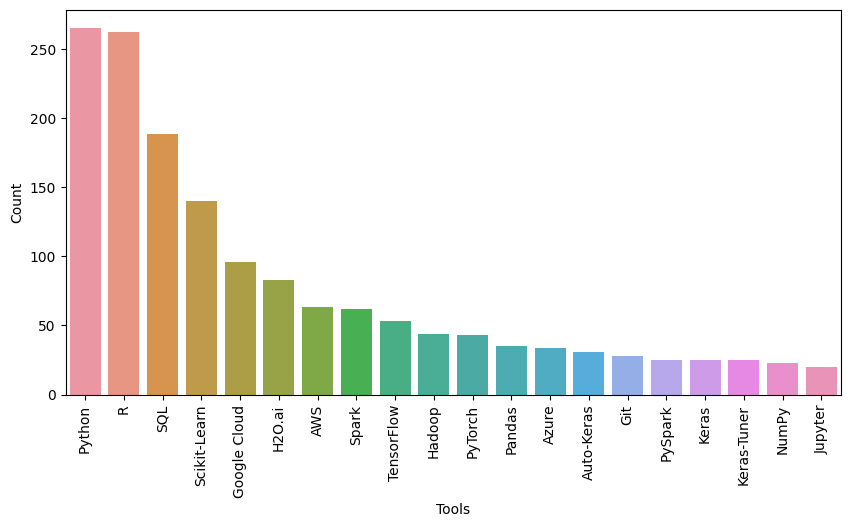

In [84]:
generate_countplot(df, 'Tools', 20)

In [ ]:
tasks = ["Python programming", "Statistics" ,"Probability", "Machine learning","Data visualization","preprocessing" "cleaning","database management", "analysis", "modeling",
         "Deep learning","Data engineering", "visualization", "manipulation", "Machine learning", "storage", "Cloud computing", "ETL",
         "warehousing","governance", "security","storytelling", "product development", "Natural language processing", "NLP",
         "Computer vision", "Business intelligence", "mining","feature engineering", "Time series analysis", "Regression analysis", "Classification algorithms",
         "Clustering algorithms", "Neural networks", "Decision trees", "random forests", "Support vector machines", "SVM", "K-nearest neighbors", "KNN", "Reinforcement learning","Hyperparameter tuning",
         "Ensemble learning", "Transfer learning", "Unsupervised learning","Supervised learning","Exploratory data analysis", "EDA", "quality control",
         "Data interpretation", "Collaboration", "communication", "Project management", "Agile development", "Software engineering", "Version control", "Debugging", "troubleshooting",
         "Continuous integration and deployment (CI/CD)", "optimization", 'deployment']


df['Skills'] = df['description'].apply(lambda x: match_phrases(x, tasks))

In [ ]:
generate_countplot(df, 'Skills', 20)

In [ ]:
import re
from fuzzywuzzy import fuzz

def extract_years_of_experience(description):
    # Regular expression pattern to match the years of experience information
    pattern = re.compile(r'(\d+\+?\s*years?\s*of\s*experience)', re.IGNORECASE)

    # search for the pattern in the job description
    match = re.search(pattern, description)

    # if there is a match, return the matched string
    if match:
        return match.group(0)
    else:
        return "Not Specified"

df['Years_of_Experience'] = df['description'].apply(extract_years_of_experience)

In [ ]:
df['Years_of_Experience'].value_counts()

In [ ]:
import re
from fuzzywuzzy import fuzz

def extract_years_of_experience(description):
    # Regular expression pattern to match the years of experience information
    pattern = re.compile(r'(\d+)\s*years?', re.IGNORECASE)

    # search for the pattern in the job description
    match = re.search(pattern, description)

    # if there is a match, return the matched string
    if match:
        return match.group(0)
    else:
        return "Not Specified"

df['Years_of_Experience'] = df['description'].apply(extract_years_of_experience)

In [ ]:
df['Years_of_Experience'].value_counts()

In [ ]:
df['years'] = df['Years_of_Experience'].str.extract(r'(\d+)').fillna(0).astype(int)

In [ ]:
df['years'].value_counts()

In [ ]:
df['experience'] = df['years'].apply(lambda x: 'Not Specified' if x == 0 or x >= 18
                                    else ('1 to 3 years' if x >= 1 and x <= 3
                                    else ('4 to 6 years' if x >= 4 and x <= 6
                                    else '6+ years')))

In [ ]:
df['experience'].value_counts()

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'experience', data = df[df['experience'] != 'Not Specified'])

In [ ]:
plt.figure(figsize = (10,5))

sns.countplot(data = df[df['experience'] != 'Not Specified'], x = 'title', hue = 'experience')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
import re
import fuzzywuzzy
from fuzzywuzzy import fuzz

def extract_education_level(description):
    education_levels = {
        'bachelor': ['bs', 'bachelor'],
        'master': ['ms', 'master'],
        'phd': ['phd'],
        'doctorate': ['doctorate']
    }
    education_level = None
    max_ratio = 0
    for level, abbreviations in education_levels.items():
        level_variants = [level] + abbreviations
        for variant in level_variants:
            ratio = fuzz.partial_token_set_ratio(variant, description)
            if ratio > max_ratio:
                max_ratio = ratio
                education_level = level
    if max_ratio >= 80:
        return education_level
    else:
        return 'Not Specified'

df['Education_Level'] = df['description'].apply(extract_education_level)

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Education_Level', data = df[df['Education_Level'] != 'Not Specified'])

In [ ]:
plt.figure(figsize = (10,5))

sns.countplot(data = df[df['Education_Level'] != 'Not Specified'], x = 'title', hue = 'Education_Level')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()